# <font color="red"> Russia vs Ukraine Tweets Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")

import nltk
import textblob
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn import metrics

from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import string

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
df = pd.read_csv("filename.csv")

In [3]:
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10009,1630331110415646721,1630305860298633216,2023-02-27 22:16:41 UTC,2023-02-27,22:16:41,0,998476071292035072,ahk14061,Andre🇳🇴🇺🇦,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'wallacemick', 'name': 'Mick ...",NaN,NaN,NaN,NaN
10010,1630331106305122304,1630202100369043459,2023-02-27 22:16:40 UTC,2023-02-27,22:16:40,0,1477276764908965889,marxistswon,Marxists Won,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'tom_username_', 'name': 'Tom...",NaN,NaN,NaN,NaN
10011,1630331106296844288,1630301689818275840,2023-02-27 22:16:40 UTC,2023-02-27,22:16:40,0,1616822734214037504,johngerver21,John Gerver,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'elonmusk', 'name': 'Elon Mus...",NaN,NaN,NaN,NaN
10012,1630331102480171009,1630181795101540357,2023-02-27 22:16:39 UTC,2023-02-27,22:16:39,0,25588052,late49er,Ben Davis,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'RonFilipkowski', 'name': 'Ro...",NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [5]:
cols = df[["tweet","language"]]
# cancer = cancer[col] # there could be columns we deleted earlier

# maybe smth with apply and lambda

for col in df.columns:
    if col not in cols: # we dont know whethever those columns were deleted before, so we will check just in case
        del df[col]

In [6]:
df

,tweet,language
0,@nazijaeger__ @derwener @Anonymous9775 Russia ...,en
1,The Russia HAARP which could destroy USA in on...,en
2,Putin gives Steven Seagal Russia&amp;#8217;s O...,en
3,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,en
4,@Pottingpinks @mfa_russia @mod_russia @mil_his...,en
...,...,...
10009,@wallacemick Its not Ukraine which investere w...,en
10010,@tom_username_ There were very dark rumors tha...,en
10011,@elonmusk If Russia lose the Rothschild are co...,en
10012,@RonFilipkowski Look forward to Russia liberat...,en


In [7]:
nltk.download("stopwords")
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huawei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import re
def remove_mentions(text):
    return re.sub(r"@\w+","",text)

df["tweet"]=df["tweet"].apply(remove_mentions) #@ ve buna bitişik ifadeleri kaldırdık

In [11]:
import re
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["tweet"] = df["tweet"].apply(clean)

In [12]:
df["tweet"]

0                             russia place satan rule well
1        russia haarp could destroy usa one fell swoop ...
2             putin give steven seagal  order friendship  
3                                  it alway project russia
4                mani millitari base russia outsid bord...
                               ...                        
10009     ukrain invester war russia putin war constant...
10010     dark rumor zelenski regim traffick child orga...
10011     russia lose rothschild come u next russia thi...
10012                       look forward russia liber kiev
10013     read yes heartbreak  russia terrorist state b...
Name: tweet, Length: 10014, dtype: object

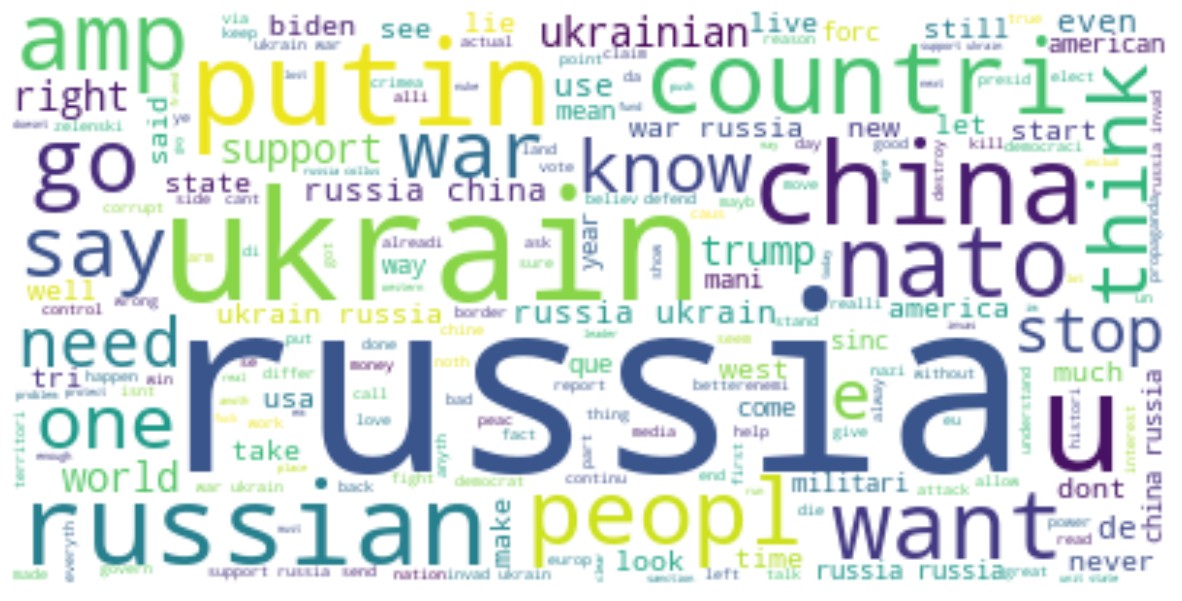

In [13]:
text = " ".join(i for i in df.tweet)
stopwords=set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
nltk.download("vader_lexicon")
sentiments=SentimentIntensityAnalyzer()

df["Positive"]=[sentiments.polarity_scores(i)["pos"] for i in df["tweet"]]
df["Negative"]=[sentiments.polarity_scores(i)["neg"] for i in df["tweet"]]
df["Neutral"]=[sentiments.polarity_scores(i)["neu"] for i in df["tweet"]]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\huawei\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
df

,tweet,language,Positive,Negative,Neutral
0,russia place satan rule well,en,0.344,0.000,0.656
1,russia haarp could destroy usa one fell swoop ...,en,0.000,0.280,0.720
2,putin give steven seagal order friendship,en,0.367,0.000,0.633
3,it alway project russia,en,0.000,0.000,1.000
4,mani millitari base russia outsid bord...,en,0.090,0.104,0.806
...,...,...,...,...,...
10009,ukrain invester war russia putin war constant...,en,0.000,0.494,0.506
10010,dark rumor zelenski regim traffick child orga...,en,0.000,0.118,0.882
10011,russia lose rothschild come u next russia thi...,en,0.000,0.197,0.803
10012,look forward russia liber kiev,en,0.000,0.000,1.000


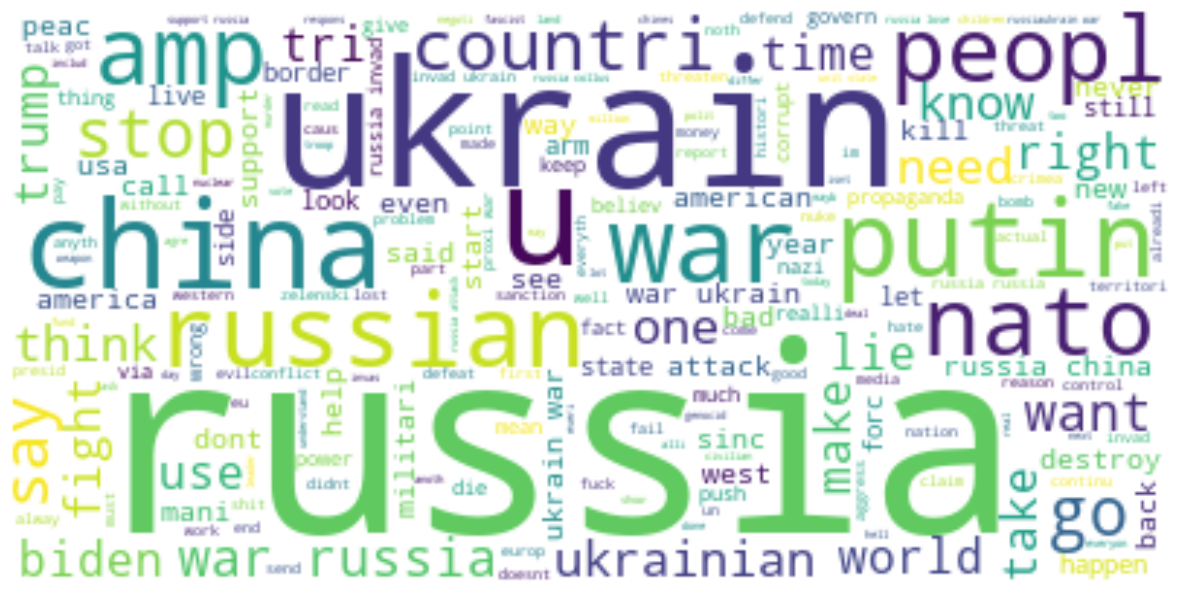

In [21]:
text = " ".join(i for i in df["tweet"][df["Positive"]<df["Negative"]])
stopwords=set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

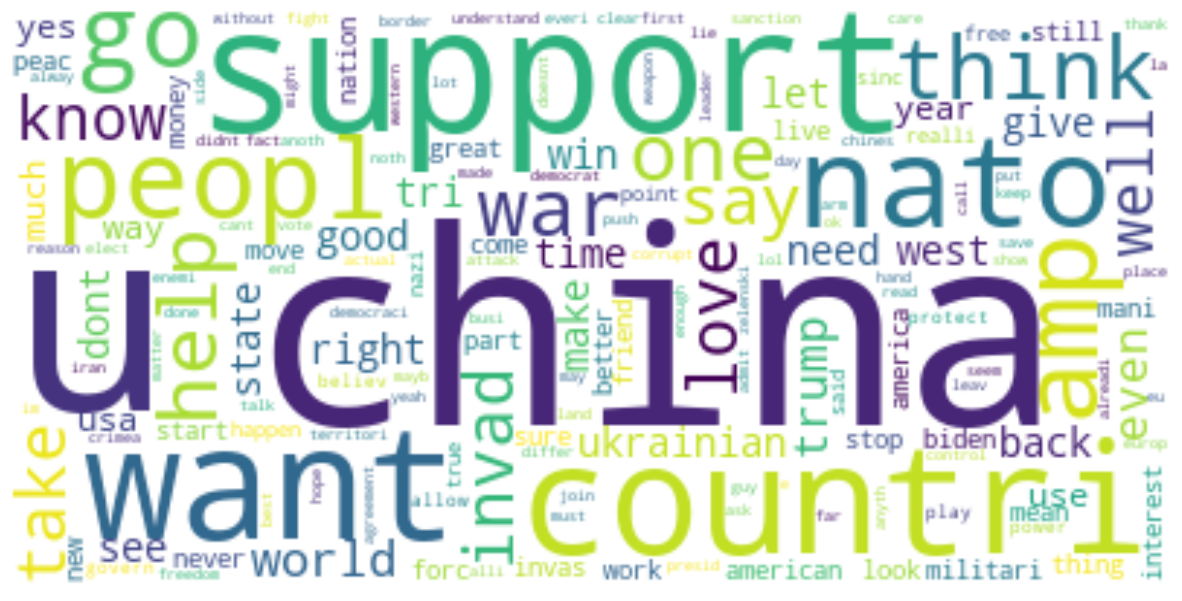

In [23]:
text = " ".join(i for i in df["tweet"][df["Positive"]>df["Negative"]])
additional_stopwords = ["russia","russian","ukrain","putin"]
stopwords=set(STOPWORDS).union(additional_stopwords)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()